In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import wandb
import pandas as pd


NO TRIAL: kitti_dataset_second_iou_active_NTK_RBF_2_40_40_100_100 - Average/3d_hard_R40
NO TRIAL: kitti_dataset_second_iou_active_NTK_ll_2_40_40_100_100 - Average/3d_hard_R40
NO TRIAL: kitti_dataset_second_iou_active_NTK_grad_2_40_40_100_100 - Average/3d_hard_R40


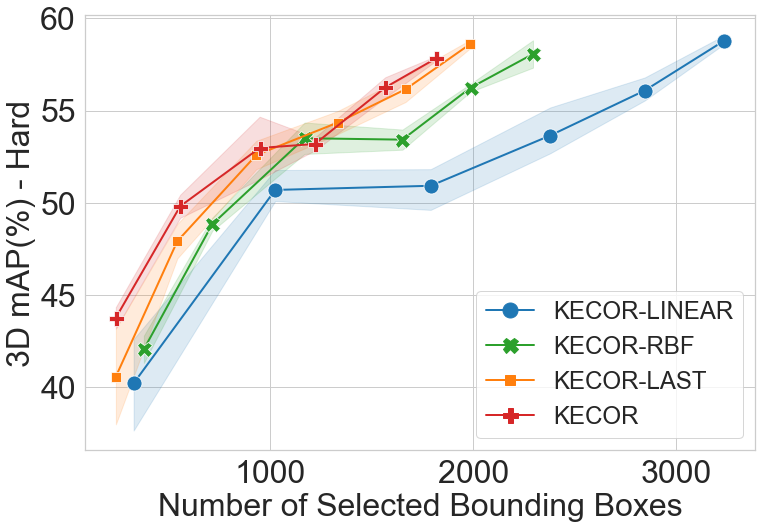

In [48]:
def remove_trash_in_keys(pd):
    for k in pd.keys():
        if '_202' in k:
            split = k.split('_202')
            new_k = split[0] + ' - ' + split[1].split(' - ')[-1]
            # print(new_k)
            pd = pd.rename(columns = {k:new_k})
    return pd

# test_path='kitti_test_3d_ez.csv'


# vis_path='iccv2023/second_3d_hard_R40_vis.csv'
# vis_baseline_path='iccv2023/second_3d_easy_R40_vis.csv'

# pvrcnn
# vis_path='kitti_vis_bev_ez.csv' 
# vis_baseline_path='iccv2023/second_bev_easy_R40_vis.csv'


# abl
# vis_baseline_path=None
# vis_path='iccv2023/pvrcnn_3d_easy_R40_vis.csv'

# rbf
vis_baseline_path='iccv2023/second_3d_hard_R40_vis.csv' 
vis_path='iccv2023_kitti/rbf/second_3d_hard_r40.csv'

backbone='second_iou'
difficulty='hard'
num_trials = 3
PC_type = '3D'
class_ = None

metric = "mAP" if class_ is None else "AP"
# methods = ['random',  'entropy', 'montecarlo','llal','coreset','badge', 'greedyboxbadge']
# methods = ['random', 'coreset','badge','llal',  'NTK_maxdet_grad_new', 'bait_grad', 'montecarlo', 'crb','NTK_grad'] # second


# methods = [ 'random' , 'entropy', 'montecarlo','coreset','llal','badge', 'NTK_bait_grad','NTK_maxdet_grad_new']
methods = ['NTK_maxdet_RBF'] # for rbf pvrcnn 
methods = ['NTK_RBF'] # for rbf pvrcnn 



# # methods = ['NTK_linear','random', 'llal', 'bait_grad','badge', 'NTK_ll']

# if test_path is None: 
#     kitti_test = pd.read_csv(vis_path) 
# else:
#     kitti_test = pd.read_csv(test_path)

# kitti_test = remove_trash_in_keys(kitti_test) 

# indices = [0]
# for i in range(1, len(kitti_test.columns)):
#     if (i-1) % num_trials == 0:
#         indices.append(i)

# kitti_test = kitti_test.iloc[:, indices]
# kitti_test = kitti_test.loc[:, ~kitti_test.columns.duplicated()]

m_ap = []
strategies = []
num_point_clouds = []
num_point_clouds_count = 0
percentage_point_clouds=[]

class_ = 'Average' if class_ is None else class_
# for method in methods:
#     if class_ == 'Average':
#         trials_name = ['Step',
#                        'kitti_dataset_pv_rcnn_active_' + method + '_40_40_100_100 - '+class_+'/'+PC_type.lower()+'_'+difficulty+'_R40',
#                        'kitti_dataset_pv_rcnn_active_' + method + '_1_40_40_100_100 - '+class_+'/'+PC_type.lower()+'_'+difficulty+'_R40',
#                        'kitti_dataset_pv_rcnn_active_' + method + '_2_40_40_100_100 - '+class_+'/'+PC_type.lower()+'_'+difficulty+'_R40']
#     else:
#         trials_name = ['Step',
#            'kitti_dataset_pv_rcnn_active_' + method + '_40_40_100_100 - '+class_+'_'+PC_type.lower()+'/'+difficulty+'_R40',
#            'kitti_dataset_pv_rcnn_active_' + method + '_1_40_40_100_100 - '+class_+'_'+PC_type.lower()+'/'+difficulty+'_R40',
#            'kitti_dataset_pv_rcnn_active_' + method + '_2_40_40_100_100 - '+class_+'_'+PC_type.lower()+'/'+difficulty+'_R40']
#     num_point_clouds_count = 0
#     for index, row in kitti_test.iterrows():
#         if row['Step'] % 40 == 0:
#             num_point_clouds_count += 100
#             for trial in range(num_trials):
#                 trial = trial + 1

#                 try:
#                     m_ap.append(row[trials_name[trial]])
#                     num_point_clouds.append(num_point_clouds_count)
#                     percentage_point_clouds.append(num_point_clouds_count/3712)
#                     strategies.append(method)
#                 except KeyError:
#                     print('KeyError:', trials_name[trial])
#                     continue



# Vis mode, we only need to change x axix, from percentage_point_clouds to percentage_boxes. 
num_bounding_boxes = []



if vis_path is not None:
    
    m_ap = []
    strategies = []


    kitti_vis = pd.read_csv(vis_path, index_col=False)
    kitti_vis = remove_trash_in_keys(kitti_vis) 
    
    # print(kitti_vis.keys())
    
    indices = [0]
    for i in range(1, len(kitti_vis.columns)):
        if (i-1) % num_trials == 0:
            indices.append(i)

    kitti_vis = kitti_vis.iloc[:, indices]
    kitti_vis = kitti_vis.loc[:, ~kitti_vis.columns.duplicated()]

    kitti_vis = remove_trash_in_keys(kitti_vis) 

    for method in methods:
        if class_ == 'Average':
            # print(class_, PC_type)
            trials_name = ['Step',
                           'kitti_dataset_'+backbone+'_active_' + method + '_40_40_100_100 - '+class_+'/'+PC_type.lower()+'_'+difficulty+'_R40',
                           'kitti_dataset_'+backbone+'_active_' + method + '_1_40_40_100_100 - '+class_+'/'+PC_type.lower()+'_'+difficulty+'_R40',
                           'kitti_dataset_'+backbone+'_active_' + method + '_2_40_40_100_100 - '+class_+'/'+PC_type.lower()+'_'+difficulty+'_R40']
        else:
            trials_name = ['Step',
               'kitti_dataset_second_iou_active_' + method + '_40_40_100_100 - '+class_+'_'+PC_type.lower()+'/'+difficulty+'_R40',
               'kitti_dataset_second_iou_active_' + method + '_1_40_40_100_100 - '+class_+'_'+PC_type.lower()+'/'+difficulty+'_R40',
               'kitti_dataset_second_iou_active_' + method + '_2_40_40_100_100 - '+class_+'_'+PC_type.lower()+'/'+difficulty+'_R40']

        no_null_data=[]
        
        existing_trails = [] 
        for trial in trials_name[1:]:
            if trial in kitti_vis.keys():
                existing_trails.append(trial)
            else:
                print('NO TRIAL:', trial)
        
        num_trials = len(existing_trails)
        if num_trials == 0:
            continue 
            
            
        # try:
        for i in range(num_trials):
            no_null_data.append(kitti_vis[[trials_name[0],existing_trails[i]]].dropna().reset_index(drop=True))
        step_indices = [i*2 for i in range(num_trials)]
        # print('num_trials:', num_trials)
        # print('step_indices: {}'.format(step_indices))
        # print('no_null_data,', no_null_data)
        # print('type(no_null_data[0]),', type(no_null_data[0]))
        step_means = pd.concat(no_null_data, axis=1, ignore_index=True)[step_indices].mean(axis=1)
        
        
        
        # for i in no_null_data:
        #     print(i)
        
        # print('step_means', step_means)
        
        for ckpt_i in range(len(step_means)):
            mean = step_means[ckpt_i]
            for i in range(num_trials):
                num_bounding_boxes.append(mean)
                strategies.append(method)
                
                m_ap.append(no_null_data[i][existing_trails[i]][ckpt_i])
                # print(no_null_data[i][existing_trails[i]][ckpt_i])
        
#         for mean in step_means:
#             for i in range(num_trials):
#                 num_bounding_boxes.append(mean)
#                 strategies.append(method)
                
#                 m_ap.append(no_null_data[i][existing_trails[i]].tolist())
#                 print(no_null_data[i][existing_trails[i]].tolist())
           
                # m_ap.append()
                
#         except:
#             step_indices = [i*2 for i in range(num_trials-1)]

#             print('step_indices: {}'.format(step_indices))

#             print('2 trial no_null_data')
#             print(no_null_data)
#             means = pd.concat(no_null_data, axis=1, ignore_index=True)[step_indices].mean(axis=1)
#             print('2 trial means')
#             print(means)
#             for mean in means:
#                 for i in range(num_trials-1):
#                     print('mean: {}'.format(mean))
#                     num_bounding_boxes.append(mean)

    num_trials = 3
    if vis_baseline_path is not None:
        methods = [ 'random' , 'entropy', 'montecarlo','coreset','llal','badge', 'NTK_bait_grad','greedyboxbadge', 'NTK_maxdet_grad_new']
        methods = ['NTK_maxdet_ll', 'NTK_maxdet_linear', 'NTK_maxdet_grad_new'] # pvrcnn rbf
        methods = ['NTK_linear', 'NTK_ll', 'NTK_grad']
        kitti_vis = pd.read_csv(vis_baseline_path, index_col=False)
        kitti_vis = remove_trash_in_keys(kitti_vis) 

        # print(kitti_vis.keys())

        indices = [0]
        for i in range(1, len(kitti_vis.columns)):
            if (i-1) % num_trials == 0:
                indices.append(i)

        kitti_vis = kitti_vis.iloc[:, indices]
        kitti_vis = kitti_vis.loc[:, ~kitti_vis.columns.duplicated()]

        kitti_vis = remove_trash_in_keys(kitti_vis) 

        for method in methods:
            if class_ == 'Average':
                trials_name = ['Step',
                               'kitti_dataset_'+backbone+'_active_' + method + '_40_40_100_100 - '+class_+'/'+PC_type.lower()+'_'+difficulty+'_R40',
                               'kitti_dataset_'+backbone+'_active_' + method + '_1_40_40_100_100 - '+class_+'/'+PC_type.lower()+'_'+difficulty+'_R40',
                               'kitti_dataset_'+backbone+'_active_' + method + '_2_40_40_100_100 - '+class_+'/'+PC_type.lower()+'_'+difficulty+'_R40']
            else:
                trials_name = ['Step',
                   'kitti_dataset_second_iou_active_' + method + '_40_40_100_100 - '+class_+'_'+PC_type.lower()+'/'+difficulty+'_R40',
                   'kitti_dataset_second_iou_active_' + method + '_1_40_40_100_100 - '+class_+'_'+PC_type.lower()+'/'+difficulty+'_R40',
                   'kitti_dataset_second_iou_active_' + method + '_2_40_40_100_100 - '+class_+'_'+PC_type.lower()+'/'+difficulty+'_R40']

            no_null_data=[]

            existing_trails = [] 
            for trial in trials_name[1:]:
                if trial in kitti_vis.keys():
                    existing_trails.append(trial)
                else:
                    print('NO TRIAL:', trial)

            num_trials = len(existing_trails)
            if num_trials == 0:
                continue 


            # try:
            for i in range(num_trials):
                no_null_data.append(kitti_vis[[trials_name[0],existing_trails[i]]].dropna().reset_index(drop=True))
            step_indices = [i*2 for i in range(num_trials)]
            # print('num_trials:', num_trials)
            # print('step_indices: {}'.format(step_indices))
            # print('no_null_data,', no_null_data)
            # print('type(no_null_data[0]),', type(no_null_data[0]))
            step_means = pd.concat(no_null_data, axis=1, ignore_index=True)[step_indices].mean(axis=1)



            # for i in no_null_data:
            #     print(i)

            # print('step_means', step_means)

            for ckpt_i in range(len(step_means)):
                mean = step_means[ckpt_i]
                for i in range(num_trials):
                    num_bounding_boxes.append(mean)
                    strategies.append(method)

                    m_ap.append(no_null_data[i][existing_trails[i]][ckpt_i])

strategies = list(map(lambda x: x.replace('greedyboxbadge', 'CRB'), strategies))
strategies = list(map(lambda x: x.replace('NTK_bait_grad', 'BAIT'), strategies))
strategies = list(map(lambda x: x.replace('NTK_grad', 'KECOR'), strategies))
strategies = list(map(lambda x: x.replace('NTK_maxdet_grad_new', 'KECOR'), strategies))

strategies = list(map(lambda x: x.replace('NTK_maxdet_linear', 'KECOR-linear'), strategies))
strategies = list(map(lambda x: x.replace('NTK_maxdet_ll', 'KECOR-last'), strategies))
strategies = list(map(lambda x: x.replace('NTK_maxdet_RBF', 'KECOR-rbf'), strategies))
strategies = list(map(lambda x: x.replace('NTK_linear', 'KECOR-linear'), strategies))
strategies = list(map(lambda x: x.replace('NTK_ll', 'KECOR-last'), strategies))
strategies = list(map(lambda x: x.replace('NTK_RBF', 'KECOR-rbf'), strategies))

strategies = list(map(lambda x: x.replace(x, x.upper()), strategies))

strategies = list(map(lambda x: x.replace('MONTECARLO', 'MC-REG'), strategies))
strategies = list(map(lambda x: x.replace('RANDOM', 'RAND'), strategies))
strategies = list(map(lambda x: x.replace('BAIT_GRAD', 'BAIT'), strategies))


y_label = PC_type+" "+metric+"(%) - "+difficulty.capitalize() if class_ == 'Average' else  PC_type+" "+metric+"(%) - "+difficulty.capitalize()+" - "+ class_
d = {"Number of Selected Point Clouds": num_point_clouds, y_label: m_ap, 'AL method': strategies}

# print('stat for test data: ')
# for k in d:
#     print(k, ':', len(d[k]))
#     print(d[k])

if vis_path is not None:
    d = {"Number of Selected Bounding Boxes": num_bounding_boxes, 
         y_label: m_ap, 'AL method': strategies}

# print('stat for vis data: ')
# for k in d:
#     print(k, ':', len(d[k]))
#     print(d[k])


ordered_methods = ['KECOR-LINEAR', 'KECOR-RBF', 'KECOR-LAST', 'KECOR'] # pv_rcnn abl
ordered_d = {"Number of Selected Bounding Boxes":[], y_label: [], 'AL method': []}
for method in ordered_methods:
    for i in range(len(d['AL method'])):
        if d['AL method'][i] == method:
            ordered_d["Number of Selected Bounding Boxes"].append(d["Number of Selected Bounding Boxes"][i])
            ordered_d[y_label].append(d[y_label][i])
            ordered_d['AL method'].append(d['AL method'][i])

data = pd.DataFrame(data=ordered_d)

"""Plot Code"""

sns.set(font_scale=2) 
sns.set_context(rc={"lines.linewidth": 2, 
                    'xtick.labelsize': 32,
                    'ytick.labelsize': 32,
                    'legend.fontsize': 24,
                    'axes.labelsize': 32
})

sns.set_style("whitegrid")
fig = plt.figure(figsize=[12,8]) # 12:8 in paper
ax = plt.axes()


# second
order = [ 6,5, 2,1,0,7,3]
color_palette = [sns.color_palette('tab10', 10)[i] for i in order]  

# pvrcnn
# order = [4, 6,5,8, 2,1,0,7,3]
# color_palette = [sns.color_palette('tab10', 10)[i] for i in order]  

# # for abl
# order = [0, 2, 3]
# color_palette = [sns.color_palette('tab10', 10)[i] for i in order]  

# for pvrcnn rbf
order = [0, 2, 1, 3]
color_palette = [sns.color_palette('tab10', 10)[i] for i in order]  


if vis_path is None:
    
    g=sns.lineplot(
        data=data,
        # x="Percentage(%) of Selected Point Clouds", y=y_label,
        x="Number of Selected Point Clouds", y=y_label, # palette=sns.color_palette('Set2'),
        markers=True, dashes=False, style="AL method", markersize=15, err_style='bars', alpha=1
        # err_kws={'alpha':0.1}
    )
    
    # xsticks_list = [100,200,300,400,500,600]
    # g.set_xticks([100,200,300,400,500,600]) 
    # xsticks_list = ["{:.1f}".format((stick*100/3712)) for stick in xsticks_list]
    # g.set_xticklabels(xsticks_list)

else:
    # g=sns.lineplot(
    #     data=data,
    #     x="Number of Selected Bounding Boxes", y=y_label, palette=sns.color_palette('husl', 7),
    #     markers=True, dashes=False, hue="AL method", style="AL method", markersize=15, ci=None, err_kws={'alpha':1}
    # )
    g=sns.lineplot(
        data=data,
        x="Number of Selected Bounding Boxes", y=y_label, palette=color_palette,
        markers=True, dashes=False, hue="AL method", style="AL method", markersize=15, err_style='band',
        err_kws={'alpha':0.15}
    )

g.legend_.set_title(None)

# g.set_ylim(45, 72) # bev hard
# g.set_ylim(47, 76) # bev mod
# g.set_ylim(56, 87) # bev ez

plt.setp(ax.get_legend().get_texts(), fontsize='26')


for t, l in zip(g.legend().get_texts(), g.legend().get_lines()):
    # l.set_marker('o')
    l.set_markersize(15)


# ax.set_xlim(234,3501)
# ax.set_title('Comparison among different values of bandwith')
save_type = 'pc' if vis_path is None else 'box'

plt.savefig("output/iccv_2023_kitti_"+backbone+"_"+PC_type+"_"+difficulty+"_"+save_type+"_level"+"_"+class_+".pdf", format="pdf", bbox_inches="tight")

In [114]:
sns.color_palette('tab10', 10) # [ 6,5, 2,1,0,7,3]

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [4]:
order = [4, 6,5,8, 2,1,0,7,3]
color_palette = [sns.color_palette('tab10', 10)[i] for i in order]  
color_palette

[(0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)]

In [21]:
order = [0, 1, 3]
color_palette = [sns.color_palette('tab10', 10)[i] for i in order]  
color_palette

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)]

## Debug KITTI

In [27]:
test_path=None
vis_path='iccv2023/3d_easy_R40.csv'
difficulty='easy'
num_trials = 3
PC_type = '3D'
class_='Average'

metric = "mAP" if class_ is None else "AP"
# methods = ['random',  'entropy', 'montecarlo','llal','coreset','badge', 'greedyboxbadge']
methods = ['NTK_linear', 'entropy', 'badge']

if test_path is None: 
    kitti_test = pd.read_csv(vis_path)
else:
    kitti_test = pd.read_csv(test_path)

indices = [0]
for i in range(1, len(kitti_test.columns)):
    if (i-1) % num_trials == 0:
        indices.append(i)

kitti_test = kitti_test.iloc[:, indices]
kitti_test = kitti_test.loc[:, ~kitti_test.columns.duplicated()]

m_ap = []
strategies = []
num_point_clouds = []
num_point_clouds_count = 0
percentage_point_clouds=[]

# for index, row in kitti_test.iterrows():
    
#     print(row.keys())
    

for k in kitti_test.keys():
    if '2023' in k:
        split = k.split('_2023')
        new_k = split[0] + ' - ' + split[1].split(' - ')[-1]
        print(new_k)
        kitti_test = kitti_test.rename(columns = {k:new_k})
        

kitti_dataset_second_iou_active_coreset_1_40_40_100_100 - Average/3d_easy_R40
kitti_dataset_second_iou_active_badge_2_40_40_100_100 - Average/3d_easy_R40
kitti_dataset_second_iou_active_llal_2_40_40_100_100 - Average/3d_easy_R40
kitti_dataset_second_iou_active_crb_40_40_100_100 - Average/3d_easy_R40
kitti_dataset_second_iou_active_coreset_40_40_100_100 - Average/3d_easy_R40
kitti_dataset_second_iou_active_badge_1_40_40_100_100 - Average/3d_easy_R40
kitti_dataset_second_iou_active_llal_1_40_40_100_100 - Average/3d_easy_R40
kitti_dataset_second_iou_active_badge_40_40_100_100 - Average/3d_easy_R40
kitti_dataset_second_iou_active_llal_40_40_100_100 - Average/3d_easy_R40
kitti_dataset_second_iou_active_NTK_linear_2_40_40_100_100 - Average/3d_easy_R40
kitti_dataset_second_iou_active_NTK_linear_1_40_40_100_100 - Average/3d_easy_R40
kitti_dataset_second_iou_active_NTK_ll_1_40_40_100_100 - Average/3d_easy_R40
kitti_dataset_second_iou_active_NTK_grad_1_40_40_100_100 - Average/3d_easy_R40
kitti_d

In [28]:
print(kitti_test)

     Step  \
0     225   
1     238   
2     239   
3     264   
4     319   
..    ...   
103  3793   
104  3982   
105  4245   
106  4740   
107  5070   

     kitti_dataset_second_iou_active_coreset_1_40_40_100_100 - Average/3d_easy_R40  \
0                                                  NaN                               
1                                                  NaN                               
2                                                  NaN                               
3                                            62.569022                               
4                                                  NaN                               
..                                                 ...                               
103                                                NaN                               
104                                                NaN                               
105                                          72.188952               

In [ ]:
for method in methods:
    if class_ == 'Average':
        trials_name = ['Step',
                       'kitti_dataset_second_iou_active_' + method + '_40_40_100_100 - '+class_+'/'+PC_type.lower()+'_'+difficulty+'_R40',
                       'kitti_dataset_second_iouactive_' + method + '_1_40_40_100_100 - '+class_+'/'+PC_type.lower()+'_'+difficulty+'_R40',
                       'kitti_dataset_second_iou_active_' + method + '_2_40_40_100_100 - '+class_+'/'+PC_type.lower()+'_'+difficulty+'_R40']
    else:
        trials_name = ['Step',
           'kitti_dataset_pv_rcnn_active_' + method + '_40_40_100_100 - '+class_+'_'+PC_type.lower()+'/'+difficulty+'_R40',
           'kitti_dataset_pv_rcnn_active_' + method + '_1_40_40_100_100 - '+class_+'_'+PC_type.lower()+'/'+difficulty+'_R40',
           'kitti_dataset_pv_rcnn_active_' + method + '_2_40_40_100_100 - '+class_+'_'+PC_type.lower()+'/'+difficulty+'_R40']
    print(trials_name)
    break

## KITTI Test 3D

step_indices: [0, 2, 4]
3 trial no_null_data
[   Step  \
0   336   
1  1227   
2  2014   
3  2567   
4  3037   
5  3363   

   kitti_dataset_second_iou_active_NTK_linear_40_40_100_100 - Average/3d_hard_R40  
0                                          37.656216                               
1                                          50.099919                               
2                                          52.324349                               
3                                          55.174097                               
4                                          56.800353                               
5                                          59.093419                               ,    Step  \
0   319   
1   736   
2  1514   
3  2113   
4  2629   
5  3067   

   kitti_dataset_second_iou_active_NTK_linear_1_40_40_100_100 - Average/3d_hard_R40  
0                                          40.376795                                 
1                                    

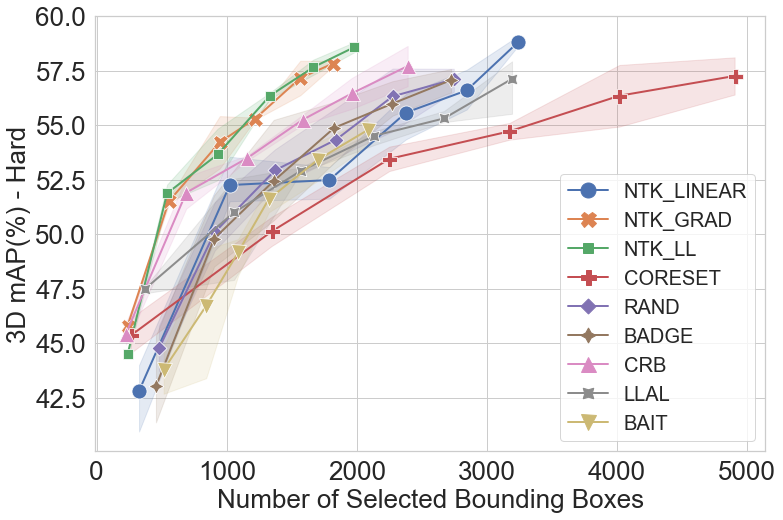

In [69]:
def remove_trash_in_keys(pd):
    for k in pd.keys():
        if '_202' in k:
            split = k.split('_202')
            new_k = split[0] + ' - ' + split[1].split(' - ')[-1]
            # print(new_k)
            pd = pd.rename(columns = {k:new_k})
    return pd

def create_plot_for_kitt_test(test_path=None, 
                              vis_path=None, 
                              difficulty='moderate', 
                              num_trials = 3,
                              PC_type = '3D', 
                              class_=None):
    metric = "mAP" if class_ is None else "AP"
    # methods = ['random',  'entropy', 'montecarlo','llal','coreset','badge', 'greedyboxbadge']
    methods = ['NTK_linear','NTK_grad','NTK_ll', 'coreset','random', 'badge', 'crb', 'llal', 'bait_grad']
    # methods = ['NTK_linear','random', 'llal', 'bait_grad','badge', 'NTK_ll']
    if test_path is None: 
        kitti_test = pd.read_csv(vis_path)
    else:
        kitti_test = pd.read_csv(test_path)
        
    kitti_test = remove_trash_in_keys(kitti_test) 
    
    indices = [0]
    for i in range(1, len(kitti_test.columns)):
        if (i-1) % num_trials == 0:
            indices.append(i)

    kitti_test = kitti_test.iloc[:, indices]
    kitti_test = kitti_test.loc[:, ~kitti_test.columns.duplicated()]

    m_ap = []
    strategies = []
    num_point_clouds = []
    num_point_clouds_count = 0
    percentage_point_clouds=[]
    
    class_ = 'Average' if class_ is None else class_
    for method in methods:
        if class_ == 'Average':
            trials_name = ['Step',
                           'kitti_dataset_second_iou_active_' + method + '_40_40_100_100 - '+class_+'/'+PC_type.lower()+'_'+difficulty+'_R40',
                           'kitti_dataset_second_iou_active_' + method + '_1_40_40_100_100 - '+class_+'/'+PC_type.lower()+'_'+difficulty+'_R40',
                           'kitti_dataset_second_iou_active_' + method + '_2_40_40_100_100 - '+class_+'/'+PC_type.lower()+'_'+difficulty+'_R40']
        else:
            trials_name = ['Step',
               'kitti_dataset_pv_rcnn_active_' + method + '_40_40_100_100 - '+class_+'_'+PC_type.lower()+'/'+difficulty+'_R40',
               'kitti_dataset_pv_rcnn_active_' + method + '_1_40_40_100_100 - '+class_+'_'+PC_type.lower()+'/'+difficulty+'_R40',
               'kitti_dataset_pv_rcnn_active_' + method + '_2_40_40_100_100 - '+class_+'_'+PC_type.lower()+'/'+difficulty+'_R40']
        num_point_clouds_count = 0
        for index, row in kitti_test.iterrows():
            if row['Step'] % 40 == 0:
                num_point_clouds_count += 100
                for trial in range(num_trials):
                    trial = trial + 1
                    
                    try:
                        m_ap.append(row[trials_name[trial]])
                        num_point_clouds.append(num_point_clouds_count)
                        percentage_point_clouds.append(num_point_clouds_count/3712)
                        strategies.append(method)
                    except KeyError:
                        continue
                        
    strategies = list(map(lambda x: x.replace('bait_grad', 'bait'), strategies))
    strategies = list(map(lambda x: x.replace(x, x.upper()), strategies))

    strategies = list(map(lambda x: x.replace('MONTECARLO', 'MC-REG'), strategies))
    strategies = list(map(lambda x: x.replace('RANDOM', 'RAND'), strategies))
    
    # Vis mode, we only need to change x axix, from percentage_point_clouds to percentage_boxes. 
    num_bounding_boxes = []
    if vis_path is not None:
        kitti_vis = pd.read_csv(vis_path, index_col=False)
        kitti_vis = remove_trash_in_keys(kitti_vis) 
        indices = [0]
        for i in range(1, len(kitti_vis.columns)):
            if (i-1) % num_trials == 0:
                indices.append(i)

        kitti_vis = kitti_vis.iloc[:, indices]
        kitti_vis = kitti_vis.loc[:, ~kitti_vis.columns.duplicated()]
        
        kitti_vis = remove_trash_in_keys(kitti_vis) 
        
        for method in methods:
            if class_ == 'Average':
                trials_name = ['Step',
                               'kitti_dataset_second_iou_active_' + method + '_40_40_100_100 - '+class_+'/'+PC_type.lower()+'_'+difficulty+'_R40',
                               'kitti_dataset_second_iou_active_' + method + '_1_40_40_100_100 - '+class_+'/'+PC_type.lower()+'_'+difficulty+'_R40',
                               'kitti_dataset_second_iou_active_' + method + '_2_40_40_100_100 - '+class_+'/'+PC_type.lower()+'_'+difficulty+'_R40']
            else:
                trials_name = ['Step',
                   'kitti_dataset_second_iou_active_' + method + '_40_40_100_100 - '+class_+'_'+PC_type.lower()+'/'+difficulty+'_R40',
                   'kitti_dataset_second_iou_active_' + method + '_1_40_40_100_100 - '+class_+'_'+PC_type.lower()+'/'+difficulty+'_R40',
                   'kitti_dataset_second_iou_active_' + method + '_2_40_40_100_100 - '+class_+'_'+PC_type.lower()+'/'+difficulty+'_R40']
            
            no_null_data=[]
            
            try:
                for i in range(num_trials):
                    no_null_data.append(kitti_vis[[trials_name[0],trials_name[i+1]]].dropna().reset_index(drop=True))
                step_indices = [i*2 for i in range(num_trials)]
                
                print('step_indices: {}'.format(step_indices))
                
                print('3 trial no_null_data')
                print(no_null_data)
                means = pd.concat(no_null_data, axis=1, ignore_index=True)[step_indices].mean(axis=1)
                print('3 trial means')
                print(means)
                for mean in means:
                    for i in range(num_trials):
                        print('mean: {}'.format(mean))
                        num_bounding_boxes.append(mean)
            except:
                step_indices = [i*2 for i in range(num_trials-1)]
                
                print('step_indices: {}'.format(step_indices))
                
                print('2 trial no_null_data')
                print(no_null_data)
                means = pd.concat(no_null_data, axis=1, ignore_index=True)[step_indices].mean(axis=1)
                print('2 trial means')
                print(means)
                for mean in means:
                    
                    for i in range(num_trials-1):
                        print('mean: {}'.format(mean))
                        num_bounding_boxes.append(mean)


              
    
    y_label = PC_type+" "+metric+"(%) - "+difficulty.capitalize() if class_ == 'Average' else  PC_type+" "+metric+"(%) - "+difficulty.capitalize()+" - "+ class_
    d = {"Number of Selected Point Clouds": num_point_clouds, y_label: m_ap, 'AL method': strategies}
    
    print('stat for test data: ')
    for k in d:
        print(k, ':', len(d[k]))
        print(d[k])
    
    if vis_path is not None:
        d = {"Number of Selected Bounding Boxes": num_bounding_boxes, 
             y_label: m_ap, 'AL method': strategies}
    
    print('stat for vis data: ')
    for k in d:
        print(k, ':', len(d[k]))
        print(d[k])
    
    data = pd.DataFrame(data=d)
    
    
    """Plot Code"""
    
    sns.set(font_scale=2) 
    sns.set_context(rc={"lines.linewidth": 2, 
                        'xtick.labelsize': 26,
                        'ytick.labelsize': 26,
                        'legend.fontsize': 20,
                        'axes.labelsize': 26
    })
    
    sns.set_style("whitegrid")
    fig = plt.figure(figsize=[12,8]) # 12:8 in paper
    ax = plt.axes()
    
    if vis_path is None:
        
        g=sns.lineplot(
            data=data,
            # x="Percentage(%) of Selected Point Clouds", y=y_label,
            x="Number of Selected Point Clouds", y=y_label,
            markers=True, dashes=False, hue="AL method", style="AL method", markersize=15, err_style='bars', alpha=1
            # err_kws={'alpha':0.1}
        )
        # xsticks_list = [100,200,300,400,500,600]
        # g.set_xticks([100,200,300,400,500,600]) 
        # xsticks_list = ["{:.1f}".format((stick*100/3712)) for stick in xsticks_list]
        # g.set_xticklabels(xsticks_list)

    else:
        g=sns.lineplot(
            data=data,
            x="Number of Selected Bounding Boxes", y=y_label,
            markers=True, dashes=False, hue="AL method", style="AL method", markersize=15, err_style='band', alpha=1,
            err_kws={'alpha':0.15}
        )
    g.legend_.set_title(None)
        
    plt.setp(ax.get_legend().get_texts(), fontsize='26')
    for t, l in zip(g.legend().get_texts(), g.legend().get_lines()):
        # l.set_marker('o')
        l.set_markersize(15)
    
    
    # ax.set_xlim(234,3501)
    # ax.set_title('Comparison among different values of bandwith')
    save_type = 'pc' if vis_path is None else 'box'
    
    plt.savefig("output/iccv_2023_kitti_"+PC_type+"_"+difficulty+"_"+save_type+"_level"+"_"+class_+".pdf", format="pdf", bbox_inches="tight")

create_plot_for_kitt_test(test_path='iccv2023/second_3d_hard_R40_test.csv', 
                          vis_path='iccv2023/second_3d_hard_R40_vis.csv',
                          difficulty='hard')
    
    
# create_plot_for_kitt_test(test_path='kitti_test_3d_moderate.csv', 
#                           vis_path='kitti_vis_3d_moderate.csv', 
#                           difficulty='moderate')
# create_plot_for_kitt_test(test_path='kitti_test_3d_hard.csv', 
#                           vis_path='kitti_vis_3d_hard.csv', 
#                           difficulty='hard')
# create_plot_for_kitt_test(test_path='kitti_test_3d_hard.csv', 
#                           difficulty='hard')
# create_plot_for_kitt_test(test_path='kitti_test_3d_moderate.csv', 
#                           difficulty='moderate')

# # create_plot_for_kitt_test(test_path='kitti_test_3d_ez.csv',
# #                           difficulty='easy')
# create_plot_for_kitt_test(test_path='kitti_test_3d_ez.csv',
#                           vis_path='kitti_vis_3d_ez.csv', 
#                           difficulty='easy')

# create_plot_for_kitt_test(test_path='kitti_test_3d_ez.csv',
#                           difficulty='easy')

# create_plot_for_kitt_test(test_path='kitti_test_BEV_ez.csv',
#                           difficulty='easy',
#                           PC_type='BEV')

# create_plot_for_kitt_test(test_path='kitti_test_BEV_moderate.csv',
#                           difficulty='moderate',
#                           PC_type='BEV')


# create_plot_for_kitt_test(test_path='kitti_test_BEV_hard.csv',
#                           difficulty='hard',
#                           PC_type='BEV')


# create_plot_for_kitt_test(test_path='kitti_test_BEV_ez.csv',
#                           vis_path='kitti_vis_BEV_ez.csv',
#                           difficulty='easy',
#                           PC_type='BEV')
# create_plot_for_kitt_test(test_path='kitti_test_BEV_moderate.csv',
#                           vis_path='kitti_vis_BEV_moderate.csv',
#                           difficulty='moderate',
#                           PC_type='BEV')
# create_plot_for_kitt_test(test_path='kitti_test_BEV_hard.csv',
#                           vis_path='kitti_vis_BEV_hard.csv',
#                           difficulty='hard',
#                           PC_type='BEV')

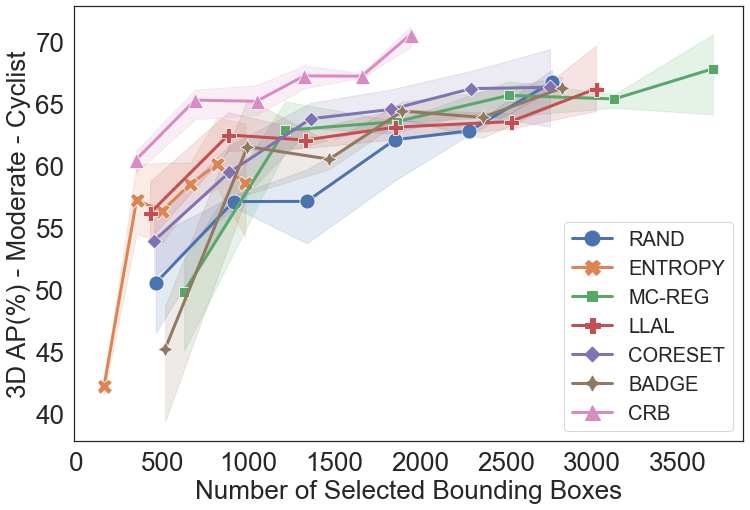

In [15]:
# create_plot_for_kitt_test(test_path='class_data/kitti_test_3D_car_hard.csv',
#                           vis_path='class_data/kitti_vis_3D_car_hard.csv',
#                           difficulty='hard',
#                           class_='Car')
# create_plot_for_kitt_test(test_path='class_data/kitti_test_3D_car_ez.csv',
#                           vis_path='class_data/kitti_vis_3D_car_easy.csv',
#                           difficulty='easy',
#                           class_='Car')
# create_plot_for_kitt_test(test_path='class_data/kitti_test_3D_car_moderate.csv',
#                           vis_path='class_data/kitti_vis_3D_car_moderate.csv',
#                           difficulty='moderate',
#                           class_='Car')

# create_plot_for_kitt_test(test_path='class_data/kitti_test_BEV_ped_hard.csv',
#                           vis_path='class_data/kitti_vis_BEV_ped_hard.csv',
#                           difficulty='hard',
#                           class_='Pedestrian',
#                          PC_type='BEV')

create_plot_for_kitt_test(test_path='class_data/kitti_test_3D_cyc_ez.csv',
                          vis_path='class_data/kitti_vis_3D_cyc_ez.csv',
                          difficulty='moderate',
                          class_='Cyclist',
                         PC_type='3D')

# crea

# # create_plot_for_kitt_test(test_path='class_data/kitti_test_3D_cyc_moderate.csv',
#                           vis_path='class_data/kitti_vis_3D_cyc_moderate.csv',
#                           difficulty='moderate',
#                           class_='Cyclist')

# create_plot_for_kitt_test(test_path='class_data/kitti_test_3D_cyc_hard.csv',
#                           vis_path='class_data/kitti_vis_3D_cyc_hard.csv',
#                           difficulty='hard',
#                           class_='Cyclist')

# create_plot_for_kitt_test(test_path='class_data/kitti_test_3D_ped_ez.csv',
#                           vis_path='class_data/kitti_vis_3D_ped_ez.csv',
#                           difficulty='easy',
#                           class_='Pedestrian')


# create_plot_for_kitt_test(test_path='class_data/kitti_test_3D_ped_moderate.csv',
#                           vis_path='class_data/kitti_vis_3D_ped_moderate.csv',
#                           difficulty='moderate',
#                           class_='Pedestrian')


# create_plot_for_kitt_test(test_path='class_data/kitti_test_3D_ped_hard.csv',
#                           vis_path='class_data/kitti_vis_3D_ped_hard.csv',
#                           difficulty='hard',
#                           class_='Pedestrian')


## ICCV2023

<Figure size 500x400 with 0 Axes>

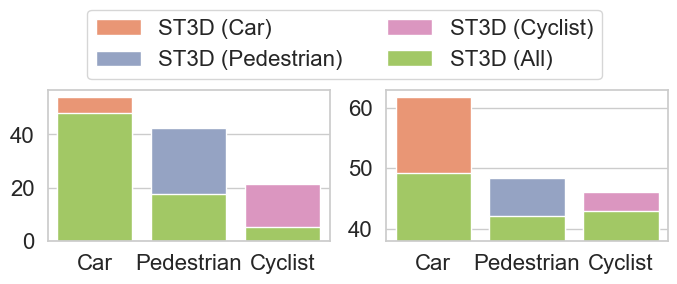

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import wandb
import pandas as pd


tips = sns.load_dataset('tips')

plt.figure(figsize=(5, 4),  dpi = 100) 


sns.set_theme(style="whitegrid", palette="Set2")
sns.set_context(rc={"lines.linewidth": 2, 
                    'xtick.labelsize': 16,
                    'ytick.labelsize': 16,
                    'legend.fontsize': 16,
                    'axes.labelsize': 16
})
fig, ax =plt.subplots(1,2, figsize=(8, 2),dpi = 100)

# sns.set(font_scale=2) 

#  20.31 ↓ ⇩ 

# nus to kitti
data={
    'method': ['ST3D (Car)', 'ST3D (Pedestrian)', 'ST3D (Cyclist)',
           'ST3D (All)', 'ST3D (All)', 'ST3D (All)',  ], 
               # 'ours multi-class', 'ours multi-class', 'ours multi-class'], 
    'class': [ 'Car', 'Pedestrian', 'Cyclist', 'Car', 'Pedestrian', 'Cyclist',  ], 
              # 'car', 'ped', 'cyc'], 
    'value': [54.13, 42.60, 21.21, 48.09, 17.61, 5.20 ],
}

# waymo to nus
# data2={
#     'method': ['ST3D (Car)', 'ST3D (Pedestrian)', 'ST3D (Cyclist)',
#            'ST3D (All)', 'ST3D (All)', 'ST3D (All)',  ],  
#                # 'ours multi-class', 'ours multi-class', 'ours multi-class'], 
#     'class': [ 'Car', 'Pedestrian', 'Cyclist', 'Car', 'Pedestrian', 'Cyclist',  ], 
#               # 'car', 'ped', 'cyc'], 
#     'value': [20.19, 5.11, 3.35, 17.83, 1.39, 3.54], 
# }

# waymo to kitti
data2={
    'method': ['ST3D (Car)', 'ST3D (Pedestrian)', 'ST3D (Cyclist)',
           'ST3D (All)', 'ST3D (All)', 'ST3D (All)',  ],  
               # 'ours multi-class', 'ours multi-class', 'ours multi-class'], 
    'class': [ 'Car', 'Pedestrian', 'Cyclist', 'Car', 'Pedestrian', 'Cyclist',  ], 
              # 'car', 'ped', 'cyc'], 
    'value': [61.83, 48.33,46.09, 49.24, 42.04, 42.95], 
}

# Nuscenes to Kitti

# df = pd.DataFrame(data=data)
g = sns.barplot(ax = ax[0], x = 'class', y = 'value', hue = 'method', data = data, edgecolor = 'w', palette=sns.color_palette('Set2')[1:], dodge=False)
g2 = sns.barplot(ax = ax[1], x = 'class', y = 'value', hue = 'method', data = data2, edgecolor = 'w', palette=sns.color_palette('Set2')[1:], dodge=False)

g.legend(loc='center left', bbox_to_anchor=(0.1 , 1.3), ncol=2)    
g2.legend([],[], frameon=False)
g2.set_ylim(38, 63)

plt.show()

fig.savefig("output/da_3d_det/multi_cls_motivation"+".pdf", format="pdf", bbox_inches="tight")

In [9]:
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]